# Linear Regression Single Neuron Model

In this notebook, I implement the single neuron model together with the gradient descent algorithm in order to solve the linear regression problem based on the * **Shill Bidding Dataset** *.

For single neuron models in practice, stochastic gradient descent should be the preferred way for optimizing the weights and bias by minimizing the cost function. I implement stochastic gradient descent with the ```train``` method used in the ```SingleNeuron``` class defined in * **Lecture 4.2 The Single Neuron Linear Regression Model** *.


## Algorithm Inplement

---

In the chunk below, I firstly define ```SingleNeuron``` class. Then define the ```linear activation function``` and ```MSE function```.

In [15]:
# Define SingleNeuron Class.
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += .5*(error**2)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

# Define linear activation function.
def linear_activation(z):
    return z

# Define MSE cost function.
def mean_sqaured_error(y_hat, y):
    return .5*(y_hat - y)**2

### Conduct linear regression model and check the loss performance.

Import the required libraries and load the Shill Bidding Dataset.

In [2]:
# Import the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import the data
df = pd.read_csv("../3. Data/Shill_Bidding_Dataset.csv")
df.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


Firstly, describe the dataset.

In [9]:
df.iloc[:,3:].describe()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


According to the result in the above chunk, all variables are between 0 and 1, except the 'Auction_Duration'.

In this notebook for linear regression, we only focus on the relationship between winning ratio (target variable) and the auction features of a shill bidder.We decide to check the relationship between 'Bidder_Tendency' and 'Winning_Ratio' by looking over the scatter plot.

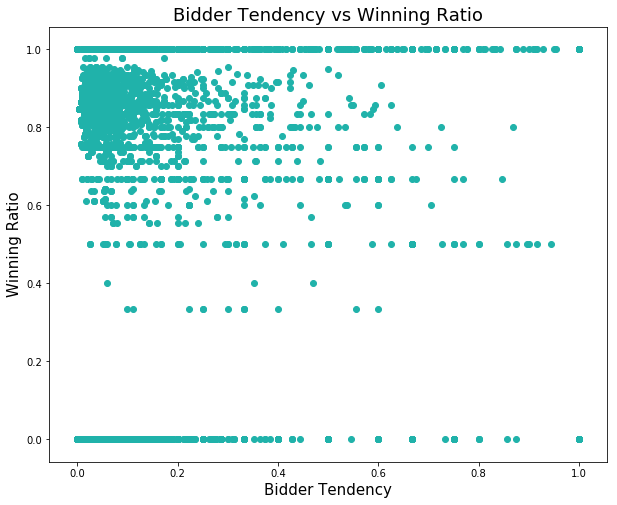

In [49]:
# Check the relationship between Bidder_Tendency and Winning_Ratio
X = df.Bidder_Tendency.values
X = X.reshape(-1, 1)
y = df.Winning_Ratio.values

# Visualization
plt.figure(figsize = (10, 8))
plt.scatter(X, 
            y, 
            color = "lightseagreen")
plt.xlabel("Bidder Tendency", fontsize = 15)
plt.ylabel("Winning Ratio", fontsize = 15)
plt.title("Bidder Tendency vs Winning Ratio", fontsize = 18)
plt.show()

From the scatter plot, we cannot observe apperant linear relationship between 'Bidder_Tendency' and 'Winning_Ratio'. Now, we will create an intstance of SingleNeuron Class and train on the data.

In [54]:
# Create and train an instance of the SingleNeuron Class
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = 0.00005, epochs = 50)

# Output the intercept, slope and the final MSE
print(f'intercept = {node.w_[1]}, slope = {node.w_[0]}')

intercept = 0.256110653865987, slope = 0.7543820924951901


Check the MSE.

In [55]:
y_pred = node.predict(X)
print(f'MSE = {mean_squared_error(y_pred, y)}')

MSE = 0.1851453381304873


Text(0.5,1,'MSE Error at Each Epoch During Training')

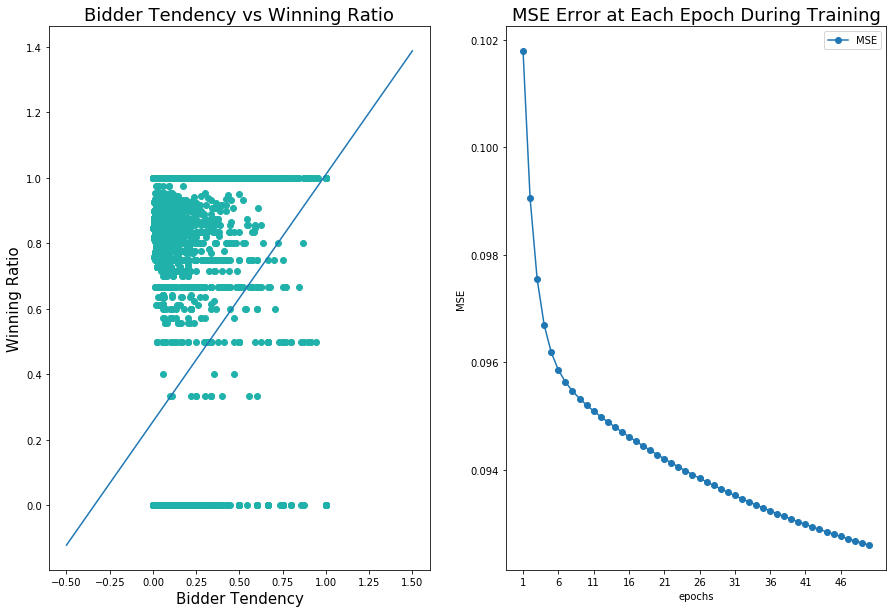

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Visualize the regression line
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)
ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("Bidder Tendency", fontsize = 15)
ax1.set_ylabel("Winning Ratio", fontsize = 15)
ax1.set_title("Bidder Tendency vs Winning Ratio", fontsize = 18)

# visualize the mean-sqaured error at each epoch
ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)

The choice of learning rate is a crucial *hyperparamter* when implementing gradient (and stochastic gradient) descent. We will do an experiment with different choices of learning rate with a fixed number of epochs.

### Experiment with different learning rate

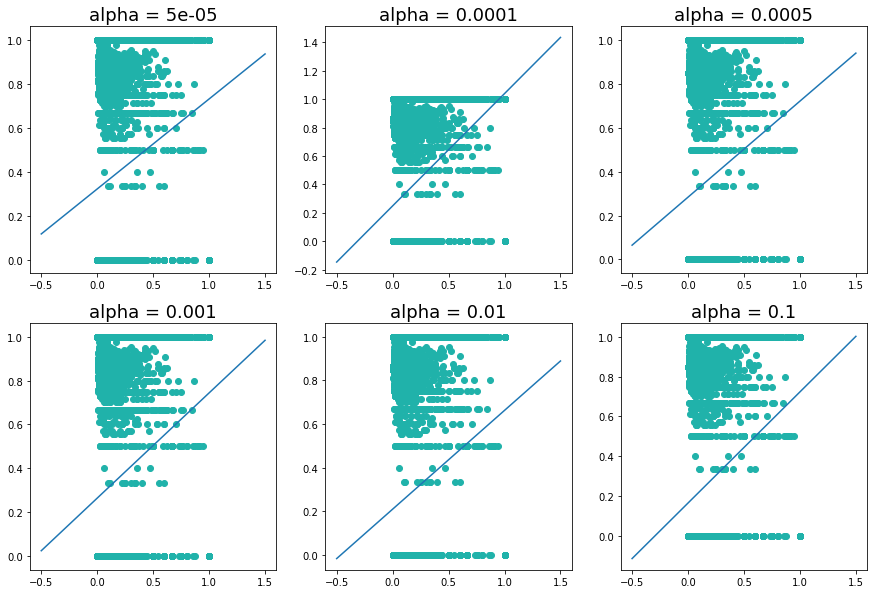

In [59]:
# Experiment with different learning rate
alpha_list = [0.00005, 0.0001, 0.0005, 0.001, 0.01,0.1]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alpha_list):
    node = SingleNeuron(linear_activation)
    node.train(X, y, epochs=10, alpha = alpha)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)

The results for different choices of learning rate are almost the same.

## Conclusion

In this notebook, we create the Single Neuron Linear Regression model by scratch, and implement on the **Shill Bidding Dataset**. We fit the model on numerical attribute and tune the hyper-parameter *learning rate, alpha*. From the visualization, we can see that the linear regression model shows the relationship between Bidder Tendency and Winning Ratio is positive.